In [1]:
import sys
sys.path.append('d://tools/CaImAn/')

In [2]:
import sys
import os
import numpy as np
from scipy.io import savemat
import caiman as cm
from caiman.components_evaluation import evaluate_components
import caiman.source_extraction.cnmf as cnmf
from caiman.source_extraction.cnmf.utilities import extract_DF_F

tifffile not found, using skimage.externals
KERAS NOT INSTALLED. IF YOU WANT TO USE THE CNN BASED COMPONENT CLASSIFIER (experimental) CONTACT THE DEVELOPERS
tifffile package not found, using skimage.external.tifffile


In [3]:
try:
    if __IPYTHON__:
        # this is used for debugging purposes only. allows to reload classes when changed
        get_ipython().magic(u'load_ext autoreload')
        get_ipython().magic(u'autoreload 2')
except NameError:       
    print('Not IPYTHON')    
    pass


import numpy as np
from time import time
from scipy.sparse import coo_matrix
import psutil
import glob
import os
import scipy
from ipyparallel import Client
#import matplotlib as mpl
#mpl.use('TkAgg')

import pylab as pl
#pl.ion()


In [13]:
fnames=('d://temp/20171025/done/Fish2_LRflow_20um_c.tif')

In [7]:
final_frate=5
K=500

In [8]:
n_processes = 5 # if using the intel nodes
single_thread=True   
dview=None
gSig=[2,2] # expected half size of neurons, works for nuclear GCaMP
merge_thresh=0.8 # merging threshold, max correlation allowed
p=1 #order of the autoregressive system
downsample_factor=1 # use .2 or .1 if file is large and you want a quick answer
final_frate=final_frate*downsample_factor
spatial_factor=0.5
idx_xy=None

In [15]:
base_name=('c://Temp/')

In [16]:
fname_new=cm.save_memmap_each([fnames], dview=dview,base_name=base_name, resize_fact=(spatial_factor, spatial_factor, downsample_factor), remove_init=0,idx_xy=idx_xy )
fname_new=cm.save_memmap_join(fname_new,base_name=base_name+'Yr', n_chunks=n_processes, dview=dview)

reshaping along x and y
(483, 256)


WindowsError: [Error 183] Cannot create a file when that file already exists

In [ ]:
Yr,dims,T=cm.load_memmap(fname_new)
Y=np.reshape(Yr,dims+(T,),order='F')

In [17]:
nb_back=1
options = cnmf.utilities.CNMFSetParms(Y,n_processes,p=p,gSig=gSig,K=K,ssub=1,tsub=1,nb=nb_back)
#options['preprocess_params']['max_num_samples_fft']=10000
Cn = cm.local_correlations(Y)
#savemat(fnames_orig[0][:-4]+'_output_correlation.mat',mdict={'Correlation_image':Cn})
Yr,sn,g,psx = cnmf.pre_processing.preprocess_data(Yr,dview=dview,**options['preprocess_params'])

checking if missing data


TypeError: unsupported operand type(s) for -: 'long' and 'NoneType'

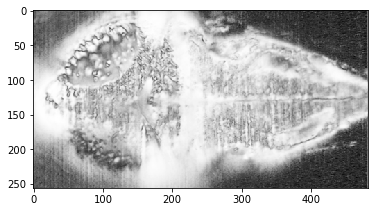

In [19]:
pl.imshow(Cn,cmap='gray') 
pl.show()

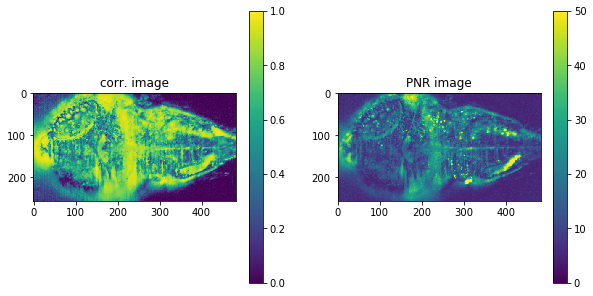

In [24]:
from caiman.summary_images import correlation_pnr
cn, pnr= correlation_pnr(Y)
pl.figure(figsize=(10, 5))
pl.subplot(1,2,1)
pl.imshow(cn, vmin=0, vmax=1)
pl.colorbar()
pl.title('corr. image')
pl.subplot(1,2,2)
pl.imshow(pnr, vmin=0, vmax=50)
pl.colorbar()
pl.title('PNR image')

In [10]:
options = cnmf.utilities.CNMFSetParms(n_processes=1,p=p,gSig=gSig,K=K,ssub=1,tsub=1,nb=1,n_pixels_per_process=1000)

TypeError: CNMFSetParms() takes at least 2 arguments (8 given)

In [27]:
options['temporal_params']

{'ITER': 2,
 'bas_nonneg': True,
 'block_size': None,
 'fudge_factor': 0.96,
 'lags': 5,
 'memory_efficient': False,
 'method': 'oasis',
 'nb': 1,
 'noise_method': 'mean',
 'noise_range': [0.25, 0.5],
 'p': 1,
 'solvers': ['ECOS', 'SCS'],
 'verbosity': False}

In [29]:
options['spatial_params']['n_pixels_per_process']=1000

In [30]:
options['spatial_params']

{'dims': (256L, 483L),
 'dist': 3,
 'extract_cc': True,
 'low_rank_background': True,
 'maxthr': 0.1,
 'medw': (3, 3),
 'method': 'dilate',
 'method_ls': 'lasso_lars',
 'n_pixels_per_process': 1000,
 'nb': 1,
 'nrgthr': 0.9999,
 'se': array([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=uint8),
 'ss': array([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=uint8),
 'thr_method': 'nrg',
 'update_background_components': True}